In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [15]:
df


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [25]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [18]:
df['Chance of Admit '] = (df['Chance of Admit '] > 0.75).astype(int)
df['Chance of Admit '] = [1 if x > 0.75 else 0 for x in df['Chance of Admit ']]
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1
496,497,337,117,5,5.0,5.0,9.87,1,1
497,498,330,120,5,4.5,5.0,9.56,1,1
498,499,312,103,4,4.0,5.0,8.43,0,0


In [19]:
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
predicted = model.predict(X_test)

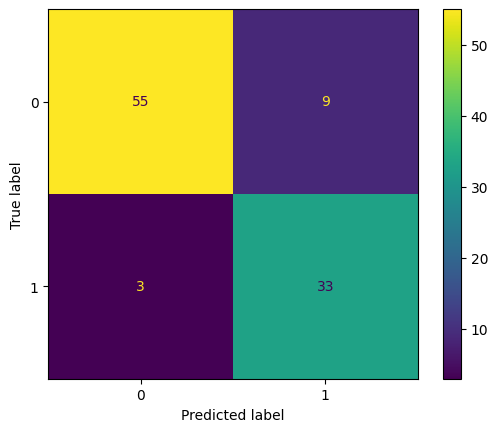

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
ConfusionMatrixDisplay.from_predictions(y_test, predicted)

In [47]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        64
           1       0.79      0.92      0.85        36

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.87       100
weighted avg       0.89      0.88      0.88       100



In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
mean_absolute_error(y_test, predicted)

0.12

In [50]:
mean_squared_error(y_test, predicted)

0.12

In [51]:
r2_score(y_test, predicted)

0.47916666666666663

[Text(0.5375, 0.9615384615384616, 'x[6] <= 8.765\ngini = 0.492\nsamples = 400\nvalue = [226.0, 174.0]'),
 Text(0.3, 0.8846153846153846, 'x[1] <= 318.5\ngini = 0.232\nsamples = 247\nvalue = [214, 33]'),
 Text(0.41874999999999996, 0.9230769230769231, 'True  '),
 Text(0.1625, 0.8076923076923077, 'x[6] <= 8.745\ngini = 0.103\nsamples = 203\nvalue = [192, 11]'),
 Text(0.1125, 0.7307692307692307, 'x[6] <= 8.255\ngini = 0.086\nsamples = 200\nvalue = [191, 9]'),
 Text(0.0875, 0.6538461538461539, 'gini = 0.0\nsamples = 121\nvalue = [121, 0]'),
 Text(0.1375, 0.6538461538461539, 'x[2] <= 98.5\ngini = 0.202\nsamples = 79\nvalue = [70, 9]'),
 Text(0.1125, 0.5769230769230769, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1625, 0.5769230769230769, 'x[4] <= 4.25\ngini = 0.184\nsamples = 78\nvalue = [70, 8]'),
 Text(0.1, 0.5, 'x[1] <= 311.5\ngini = 0.151\nsamples = 73\nvalue = [67, 6]'),
 Text(0.05, 0.4230769230769231, 'x[1] <= 306.5\ngini = 0.264\nsamples = 32\nvalue = [27, 5]'),
 Text(0.025, 0.

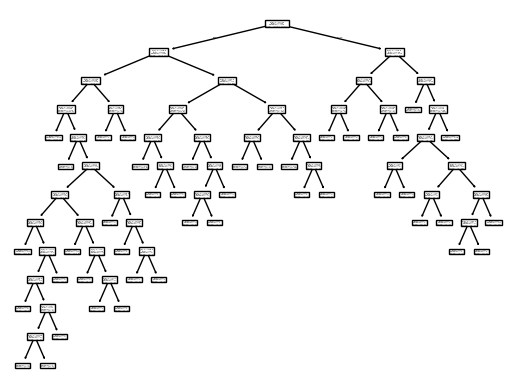

In [52]:
plot_tree(model)